# 배달

**문제 설명**

    N개의 마을로 이루어진 나라가 있습니다. 이 나라의 각 마을에는 1부터 N까지의 번호가 각각 하나씩 부여되어 있습니다. 각 마을은 양방향으로 통행할 수 있는 도로로 연결되어 있는데, 서로 다른 마을 간에 이동할 때는 이 도로를 지나야 합니다. 도로를 지날 때 걸리는 시간은 도로별로 다릅니다. 현재 1번 마을에 있는 음식점에서 각 마을로 음식 배달을 하려고 합니다. 각 마을로부터 음식 주문을 받으려고 하는데, N개의 마을 중에서 K 시간 이하로 배달이 가능한 마을에서만 주문을 받으려고 합니다. 다음은 N = 5, K = 3인 경우의 예시입니다.
    
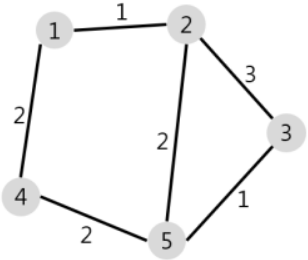

    위 그림에서 1번 마을에 있는 음식점은 [1, 2, 4, 5] 번 마을까지는 3 이하의 시간에 배달할 수 있습니다. 그러나 3번 마을까지는 3시간 이내로 배달할 수 있는 경로가 없으므로 3번 마을에서는 주문을 받지 않습니다. 따라서 1번 마을에 있는 음식점이 배달 주문을 받을 수 있는 마을은 4개가 됩니다.
    마을의 개수 N, 각 마을을 연결하는 도로의 정보 road, 음식 배달이 가능한 시간 K가 매개변수로 주어질 때, 음식 주문을 받을 수 있는 마을의 개수를 return 하도록 solution 함수를 완성해주세요.
    
    
**제한사항**


    - 마을의 개수 N은 1 이상 50 이하의 자연수입니다.
    - road의 길이(도로 정보의 개수)는 1 이상 2,000 이하입니다.
    - road의 각 원소는 마을을 연결하고 있는 각 도로의 정보를 나타냅니다.
    - road는 길이가 3인 배열이며, 순서대로 (a, b, c)를 나타냅니다.
    - a, b(1 ≤ a, b ≤ N, a != b)는 도로가 연결하는 두 마을의 번호이며, c(1 ≤ c ≤ 10,000, c는 자연수)는 도로를 지나는데 걸리는 시간입니다.
    - 두 마을 a, b를 연결하는 도로는 여러 개가 있을 수 있습니다.
    - 한 도로의 정보가 여러 번 중복해서 주어지지 않습니다.
    - K는 음식 배달이 가능한 시간을 나타내며, 1 이상 500,000 이하입니다.
    - 임의의 두 마을간에 항상 이동 가능한 경로가 존재합니다.
    - 1번 마을에 있는 음식점이 K 이하의 시간에 배달이 가능한 마을의 개수를 return 하면 됩니다.
    
**입출력 예**

|N|	road|	K|	result|
|:-:|:-|:-:|:--:|
|5|	[[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]]|	3|	4|
|6|	[[1,2,1],[1,3,2],[2,3,2],[3,4,3],[3,5,2],[3,5,3],[5,6,1]]|	4|	4|

**입출력 예 설명**

입출력 예 #1

    문제의 예시와 같습니다.

입출력 예 #2

    주어진 마을과 도로의 모양은 아래 그림과 같습니다.
    
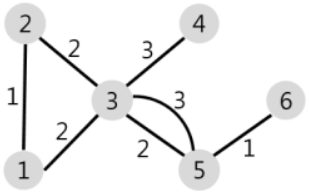

    1번 마을에서 배달에 4시간 이하가 걸리는 마을은 [1, 2, 3, 5] 4개이므로 4를 return 합니다.

### 다익스트라 알고리즘이란?
---

- 다익스트라 알고리즘은 그래프 알고리즘 중 하나로 최단 경로를 구하는 알고리즘
- 시간복잡도는 `V`를 노드, `E`를 간선이라 했을 때, `O(E log V)`입니다.

참고: https://m.blog.naver.com/kks227/220796029558 

In [1]:
import heapq

def dijkstra(G, start):
    queue = []

    heapq.heappush(queue, [0, start])
    result = [ float('inf') for _ in range(len(G))]
    result[start] = 0

    while queue:
        current_dist, current_node = heapq.heappop(queue)
        if result[current_node] < current_dist:
            continue
        for weight, adjacent in G[current_node]:
            distance = current_dist + weight

            if distance < result[adjacent]:
                result[adjacent] = distance
                heapq.heappush(queue,[distance, adjacent])
    return result

def solution(N,road, K):

    G=[[] for _ in range(N+1)]
    for i in road:
        start,end,distance= i
        G[start].append([distance,end])
        G[end].append([distance,start])
    shortest_dist = dijkstra(G,1)
    answer = len([x for x in shortest_dist if x<=K])

    return answer

In [2]:
# Test Case 1
N = 5
road = [[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]]
K = 3
assert 4 == solution(N,road, K)

In [3]:
# Test Case 2
N = 6
road = [[1,2,1],[1,3,2],[2,3,2],[3,4,3],[3,5,2],[3,5,3],[5,6,1]]
K = 4
assert 4 == solution(N,road, K)

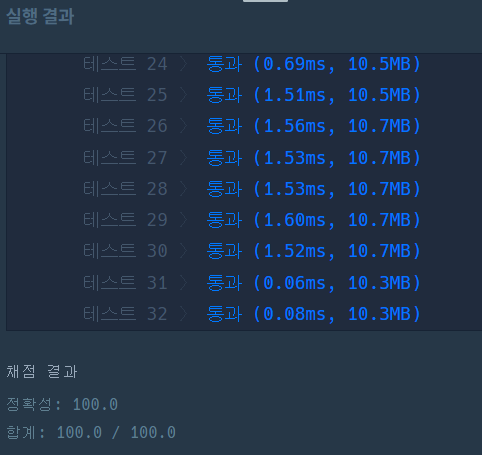

In [5]:
from queue import PriorityQueue # 파이썬 내장 모듈

def dijkstra(road, N):
    queue = PriorityQueue() # 우선순위 큐
    queue.put([1, 0]) # 1번 마을부터 시작
    
    dist = [float('inf')] * (N + 1) # 계산하기 편하게 N+1 길이만큼 리스트 생성
    dist[1] = 0 # 1번 마을은 무조건 거리가 0
    
    while not queue.empty():
        current, current_cost = queue.get() # 현재 선택된 노드와 비용
        for src, dest, cost in road: # 출발지, 목적지, 비용
            next_cost = cost + current_cost # 비용
            if src == current and next_cost < dist[dest]:
                # src가 현재 선택된 노드면서 목적지까지 더 저렴할 경우
                dist[dest] = next_cost # 최소 비용을 갱신
                queue.put([dest, next_cost]) # Priority Queue에 추가
            elif dest == current and next_cost < dist[src]:
                # dest가 현재 선택된 노드면서 출발지까지 더 저렴할 경우
                dist[src] = next_cost # 최소 비용을 갱신
                queue.put([src, next_cost]) # Priority Queue에 추가
    return dist

def solution(N, road, K):
    dist = dijkstra(road, N)
    return len([x for x in dist if x <= K]) # list comprehension

In [6]:
# Test Case 1
N = 5
road = [[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]]
K = 3
assert 4 == solution(N,road, K)

In [7]:
# Test Case 2
N = 6
road = [[1,2,1],[1,3,2],[2,3,2],[3,4,3],[3,5,2],[3,5,3],[5,6,1]]
K = 4
assert 4 == solution(N,road, K)